# 프로젝트의 목표
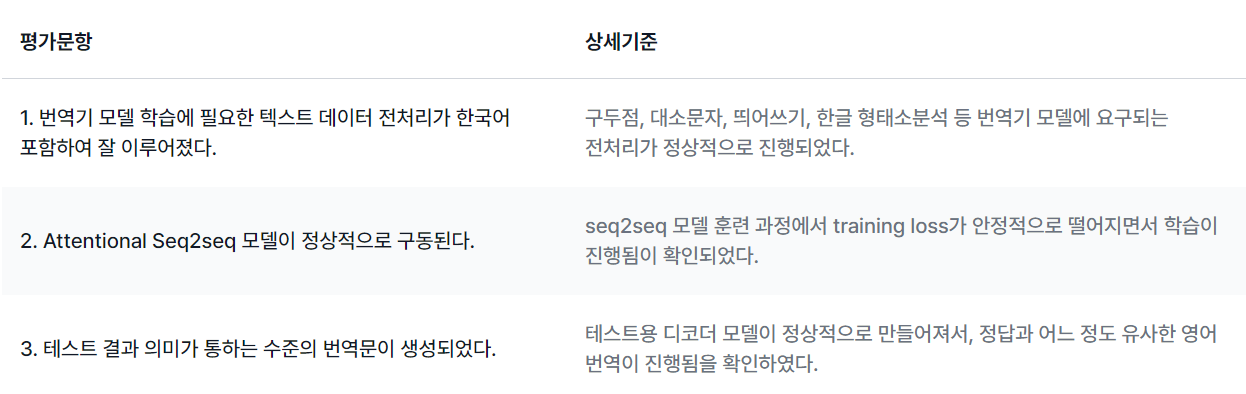

# 데이터 로드

In [1]:
import requests
import os
import tarfile

# 다운로드할 파일의 링크 및 파일 이름 설정
file_info = {
    'korean-english-park.train.tar.gz': 'https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz',
    'korean-english-park.dev.tar.gz': 'https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.dev.tar.gz',
    'korean-english-park.test.tar.gz': 'https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.test.tar.gz'
}

# 저장할 디렉토리
save_dir = './data'
os.makedirs(save_dir, exist_ok=True)

# 파일 다운로드 함수
def download_file(url, file_name, save_dir):
    file_path = os.path.join(save_dir, file_name)

    # 파일 다운로드
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            f.write(response.raw.read())
        print(f'{file_name} 다운로드 완료.')
    else:
        print(f'{url} 다운로드 실패.')

# tar.gz 파일 압축 해제 함수
def extract_tar_gz(file_name, save_dir):
    file_path = os.path.join(save_dir, file_name)
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=save_dir)
        print(f'{file_name} 압축 해제 완료.')

# 파일 다운로드 및 압축 해제 실행
for file_name, url in file_info.items():
    download_file(url, file_name, save_dir)
    extract_tar_gz(file_name, save_dir)

# 파일 로드 함수 (데이터 읽기)
def load_file(file_name, save_dir):
    file_path = os.path.join(save_dir, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        raw = f.read().splitlines()
    print("Data Size:", len(raw))
    print("Example:")

    for sen in raw[0:100][::20]:
        print(">>", sen)
    return raw

# 각 파일의 데이터를 불러와 하나의 변수에 합치기 (리스트로 저장)
raw_kor = []

raw_kor += load_file('korean-english-park.train.ko', save_dir)
raw_kor += load_file('korean-english-park.dev.ko', save_dir)
raw_kor += load_file('korean-english-park.test.ko', save_dir)

# 데이터 크기 확인
print('Total data size:', len(raw_kor))


korean-english-park.train.tar.gz 다운로드 완료.
korean-english-park.train.tar.gz 압축 해제 완료.
korean-english-park.dev.tar.gz 다운로드 완료.
korean-english-park.dev.tar.gz 압축 해제 완료.
korean-english-park.test.tar.gz 다운로드 완료.
korean-english-park.test.tar.gz 압축 해제 완료.
Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.
Data Size: 1000
Example:
>> 세계 에서 가장 강력한 수퍼컴퓨터를 1년 동안이나 독점해 오던 정부의 연구학자들이 이 1억1천만 달러 짜리 경이로운 설비를 공개하며, 이것이 핵전쟁으로부터 세계를 구하는데 도움이 될지도 모른다고 말했다.
>> 무기 사찰관들의 복귀에 대하여 이라크 측의 한 관리가 "유익하고 효과적인" 논의였다고 말한 회합에서 유엔 무기 사찰단장이 이라크 대표단을 만났다.
>> 하드웨어를 구입하는 비용의 문제가 커다란 장애입니다.
>> 토의에 참가한 대부분의 사람들은 정부가 통신 내용을 도청할 수 있는 권리를 보유해야 할 필요성이 있는 합법적인 부분도 있다는 데에 동의를 한다.
>> 그는 눈에 띄지 않게

In [2]:
raw_en = []
raw_en += load_file('korean-english-park.train.en', save_dir)
raw_en += load_file('korean-english-park.dev.en', save_dir)
raw_en += load_file('korean-english-park.test.en', save_dir)

# 데이터 크기 확인
print('Total data size:', len(raw_en))

Data Size: 94123
Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “Guard robots are used privately and professionally to detect intruders or fire,” Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lungs the kind of workout they get from aerobic activities such as brisk walking or running for at least 20 minutes.
Data Size: 1000
Example:
>> After keeping the world's most powerful supercomputer to themselves for a year, government researchers showed off the $110 million wonder and said it might help save the world from nuclear war.
>> The head of the U.N. weapons inspection

# 중복 데이터 제거 및 데이터 쌍으로 만들기(한글, 영어)

In [3]:
raw = zip(raw_kor, raw_en)
raw

In [4]:
# 중복 데이터 제거 코드
set_raw = set(raw)

In [5]:
len(set_raw)

81959

In [6]:
cleaned_corpus_kor, cleaned_corpus_eng = zip(*set_raw)

In [7]:
print('korean data size:', len(cleaned_corpus_kor))
print('english data size:', len(cleaned_corpus_eng))

korean data size: 81959
english data size: 81959


In [8]:
cleaned_corpus_kor[80]

'솜차이 옹사왓 태국총리의 퇴진을 요구하는 시위를 계속하고 있는 반정부단체 수천 명이 공항을 점거한 다음 날 폭탄테러가 발생했다.'

In [9]:
cleaned_corpus_eng[80]

'The blasts come a day after thousands of anti-government protesters stormed the airport in an ongoing battle to oust Thai Prime Minister Somchai Wongsawat, who was returning from an economic summit in Peru.'

# 한국언어 전처리 및 <start>, <end> 토큰을 추가

In [10]:
import re
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'

    return sentence

In [11]:
for kor, eng in zip(cleaned_corpus_kor, cleaned_corpus_eng):
  print(kor, eng)
  break

첼시의 중앙 수비수인 테리는 지난 13일(현지시간) 잉글랜드가 E조 예선 홈경기에서 에스토니아를 3-0으로 대파할 때 무릎 부상을 이유로 경기에 나서지 못했다. The Chelsea central defender, who missed Saturday's 3-0 win over Estonia with a knee injury, returned to training on Monday morning and was given the all-clear to travel for a match which offers England the chance to seal their place in next year's finals.


In [12]:
enc_corpus = []
dec_corpus = []

# num_examples = 30000
cnt=0
for kor, eng in zip(cleaned_corpus_kor, cleaned_corpus_eng):
    temp_kor = preprocess_sentence(kor)
    temp_eng = preprocess_sentence(eng, s_token=True, e_token=True)

    if len(temp_kor) <= 50:
        enc_corpus.append(temp_kor)
        dec_corpus.append(temp_eng)

print('korean data size:', len(enc_corpus))
print('english data size:', len(dec_corpus))
print("Korean:", enc_corpus[100])
print("English:", dec_corpus[100])

korean data size: 28214
english data size: 28214
Korean: 영한사전 약어표 한영사전 약어표
English: <start> the museum had functioned as the national museum of contemporary art korea until it was closed down in . <end>


In [13]:
print("Korean:", enc_corpus[45])
print("English:", dec_corpus[44])

Korean: 아라고네스는 이탈리아가 좀처럼 공간을 내주지 않아 우리팀 선수들이 고전했다 고 덧붙였다 .
English: <start> a sixth was charged with aiding and abetting the illegal possession of firearms by three of the others . <end>


In [14]:
print("Korean:", cleaned_corpus_kor[5])
print("English:", cleaned_corpus_eng[5])

Korean: 이밖에 응답자의 15% 가량은 식사나 회의를 중단시키더라도 휴대폰을 받는다고 답변했다.
English: The poll also revealed about a quarter of respondents felt the need to answer their phone even if it interrupts a meal or a meeting.


In [17]:
from konlpy.tag import Okt
import tensorflow as tf

vocab_size = 50000

def tokenize(corpus, kor=False, eng=True):
    if kor:
        okt = Okt()
        # 한국어 문장을 형태소 분석
        morph = [" ".join(okt.morphs(sen)) for sen in corpus]

        # Tokenizer 설정 및 fitting
        tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', num_words=vocab_size)
        tokenizer.fit_on_texts(morph)

        # 텍스트를 시퀀스로 변환
        tensor = tokenizer.texts_to_sequences(morph)
        tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    if eng:
        # 영어 데이터를 토크나이징
        tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', num_words=vocab_size)
        tokenizer.fit_on_texts(corpus)

        tensor = tokenizer.texts_to_sequences(corpus)
        tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [18]:
from sklearn.model_selection import train_test_split
enc_tensor, enc_tokenizer = tokenize(enc_corpus, kor=True)
dec_tensor, dec_tokenizer = tokenize(dec_corpus, eng=True)

enc_train, enc_val, dec_train, dec_val = \
train_test_split(enc_tensor, dec_tensor, test_size=0.25)

print("Korean Vocab Size:", len(enc_tokenizer.index_word))
print("English Vocab Size:", len(dec_tokenizer.index_word))

Korean Vocab Size: 70148
English Vocab Size: 24047


# 모델 구조 설계

In [19]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)

    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))

        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [20]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()

        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)

    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)

        return out

In [21]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)

        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [23]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1 # 예: len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1 # 예: len(dec_tokenizer.index_word) + 1

units         = 128
embedding_dim = 128

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 40

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 40, 128)
Decoder Output: (64, 24048)
Decoder Hidden State: (64, 128)
Attention: (64, 40, 1)


In [24]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    return tf.reduce_mean(loss)

In [25]:
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]

        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)

    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [ ]:
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]

    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)

    batch_loss = (loss / int(tgt.shape[1]))

    return batch_loss


# Training Process

from tqdm import tqdm
import random
EPOCHS = 3

for epoch in range(EPOCHS):
    total_loss = 0

    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)

        total_loss += batch_loss

        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

    test_loss = 0

    idx_list = list(range(0, enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_val[idx:idx+BATCH_SIZE],
                                    dec_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)

        test_loss += test_batch_loss

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))

Epoch  1:  66%|██████▌   | 217/331 [36:14<18:37,  9.80s/it, Loss 1.7776]